In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the training data
train_data = pd.read_csv('train.csv')
x_train = train_data.drop('Survived', axis=1).values
y_train = train_data['Survived'].values

Implementation of Naive Bayes Algorithm

In [4]:
class NaiveBayes:
    def __init__(self):
        self.classes = None
        self.class_priors = None
        self.feature_probs = None
    
    def fit(self, x, y):
        self.classes = np.unique(y)
        num_classes = len(self.classes)
        num_features = x.shape[1]
        
        # Compute class priors
        self.class_priors = np.zeros(num_classes)
        for i, c in enumerate(self.classes):
            self.class_priors[i] = np.sum(y == c) / len(y)
        
        # Compute feature probabilities
        self.feature_probs = np.zeros((num_classes, num_features))
        for i, c in enumerate(self.classes):
            x_c = x[y == c]
            self.feature_probs[i] = (np.sum(x_c, axis=0) + 1) / (np.sum(x_c) + num_features)
    
    def predict(self, x):
        num_samples = x.shape[0]
        num_classes = len(self.classes)
        y_pred = np.zeros(num_samples)
        
        for i in range(num_samples):
            probabilities = np.zeros(num_classes)
            for j in range(num_classes):
                probabilities[j] = np.prod(x[i] * self.feature_probs[j]) * self.class_priors[j]
            y_pred[i] = self.classes[np.argmax(probabilities)]
        
        return y_pred

Implementation of KNN Algorithm

In [5]:
class KNN:
    def __init__(self, k=5):
        self.k = k
        self.x_train = None
        self.y_train = None
    
    def fit(self, x, y):
        self.x_train = x
        self.y_train = y
    
    def predict(self, x):
        num_samples = x.shape[0]
        y_pred = np.zeros(num_samples)
        
        for i in range(num_samples):
            distances = np.linalg.norm(self.x_train - x[i], axis=1)
            nearest_indices = np.argsort(distances)[:self.k]
            nearest_labels = self.y_train[nearest_indices]
            y_pred[i] = np.bincount(nearest_labels).argmax()
        
        return y_pred

Loading and Preprocessing the training and the test data

In [9]:
# Load the training data
train_data = pd.read_csv('train.csv')
x_train = train_data.drop('Survived', axis=1).values
y_train = train_data['Survived'].values

# Load the test data
test_data = pd.read_csv('test.csv')

# Preprocess the training data
train_data_encoded = pd.get_dummies(train_data)

# Preprocess the test data
test_data_encoded = pd.get_dummies(test_data)

# Get the common columns between training and test data
common_columns = set(train_data_encoded.columns) & set(test_data_encoded.columns)

# Reindex the training and test data with the common columns
x_train_encoded = train_data_encoded.reindex(columns=common_columns, fill_value=0).values
x_test_encoded = test_data_encoded.reindex(columns=common_columns, fill_value=0).values

# Initialize and train the Naive Bayes model
nb = NaiveBayes()
nb.fit(x_train_encoded, y_train)

# Make predictions using Naive Bayes
nb_predictions = nb.predict(x_test_encoded)

# Initialize and train the KNN model
knn = KNN(k=5)
knn.fit(x_train_encoded, y_train)

# Make predictions using KNN
knn_predictions = knn.predict(x_test_encoded)

I preprocesseed the test data by using pd.get_dummies() to perform one-hot encoding. 
This converts categorical variables into binary columns. 
I then aligned the test data with the training data columns using reindex() to ensure that they have the same set of columns.

Calculating Accuracy

In [10]:
# Load the ground truth labels
ground_truth = pd.read_csv('gender_submission.csv')['Survived'].values

# Calculate accuracy
nb_accuracy = np.mean(nb_predictions == ground_truth)
knn_accuracy = np.mean(knn_predictions == ground_truth)

print("Naive Bayes accuracy:", nb_accuracy)
print("KNN accuracy:", knn_accuracy)

Naive Bayes accuracy: 0.6363636363636364
KNN accuracy: 0.6483253588516746


VISUALIZATION: 
Accuracy Comparision - Naive Bayes vs KNN using bar plot

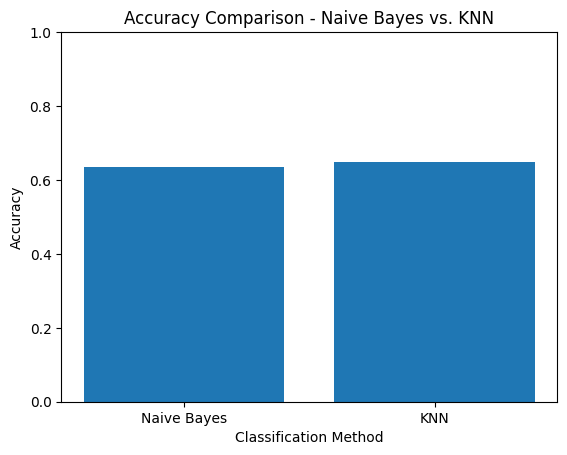

In [12]:
# Create a bar plot of the accuracies
methods = ['Naive Bayes', 'KNN']
accuracies = [nb_accuracy, knn_accuracy]

plt.bar(methods, accuracies)
plt.xlabel('Classification Method')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison - Naive Bayes vs. KNN')
plt.ylim(0, 1)  # Set y-axis limits to ensure visibility of the bars
plt.show()